In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('../data/processed/star_classification.csv')
encoder = LabelEncoder()
data_class = encoder.fit_transform(data['class'])
data_class = pd.DataFrame(data_class, columns=['class'])
indice= data_class[data_class['class']==3].index
data = data.drop(indice)
data_class = data_class.drop(indice)
data = data.drop('class', axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2, random_state=0)

In [5]:
from joblib import dump
gnb = GaussianNB()
model = gnb.fit(X_train, y_train.values.ravel())
dump(model, '../models/naive_bayes.joblib')

['../models/naive_bayes.joblib']

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     11859
           1       0.45      0.73      0.56      3840
           2       0.32      0.29      0.31      4301

    accuracy                           0.57     20000
   macro avg       0.50      0.54      0.51     20000
weighted avg       0.59      0.57      0.57     20000

auc score for class 0:  0.723326803572572
auc score for class 1:  0.8063239512427806
auc score for class 2:  0.6022734955476855


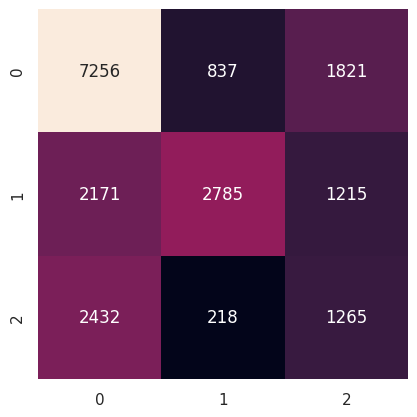

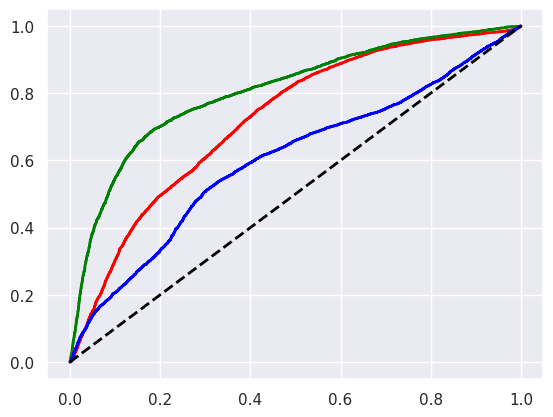

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
#confusion matrix
sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#roc curve
y_score = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
sns.set()
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='Class 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',
            lw=lw, label='Class 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',
            lw=lw, label='Class 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
# auc score
print("auc score for class 0: ", roc_auc[0])
print("auc score for class 1: ", roc_auc[1])
print("auc score for class 2: ", roc_auc[2])